<a href="https://colab.research.google.com/github/2303A52155/STML_2303A52155/blob/main/SML_LAB6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NAME:K.SHAILAJA

HT.NO:2303A52155

BATCH:34

# QUESTION-1
Imagine you are developing a simple machine learning model to predict whether a student will pass a course based on the following five features:

Study Hours per Week: Number of hours the student studies per week.
Class Attendance (%): Percentage of classes attended by the student.
Previous Exam Score (%): Score in the previous exam.
Participation in Group Study: Whether the student participates in group study sessions (1 for Yes, 0 for No).
Submission of Assignments (%): Percentage of assignments submitted by the student.
Dataset

Below is an example dataset with 10 students (rows), 5 features, and a binary target label (Pass/Fail). The target label is 1 if the student is predicted to pass, and 0 if they are predicted to fail.

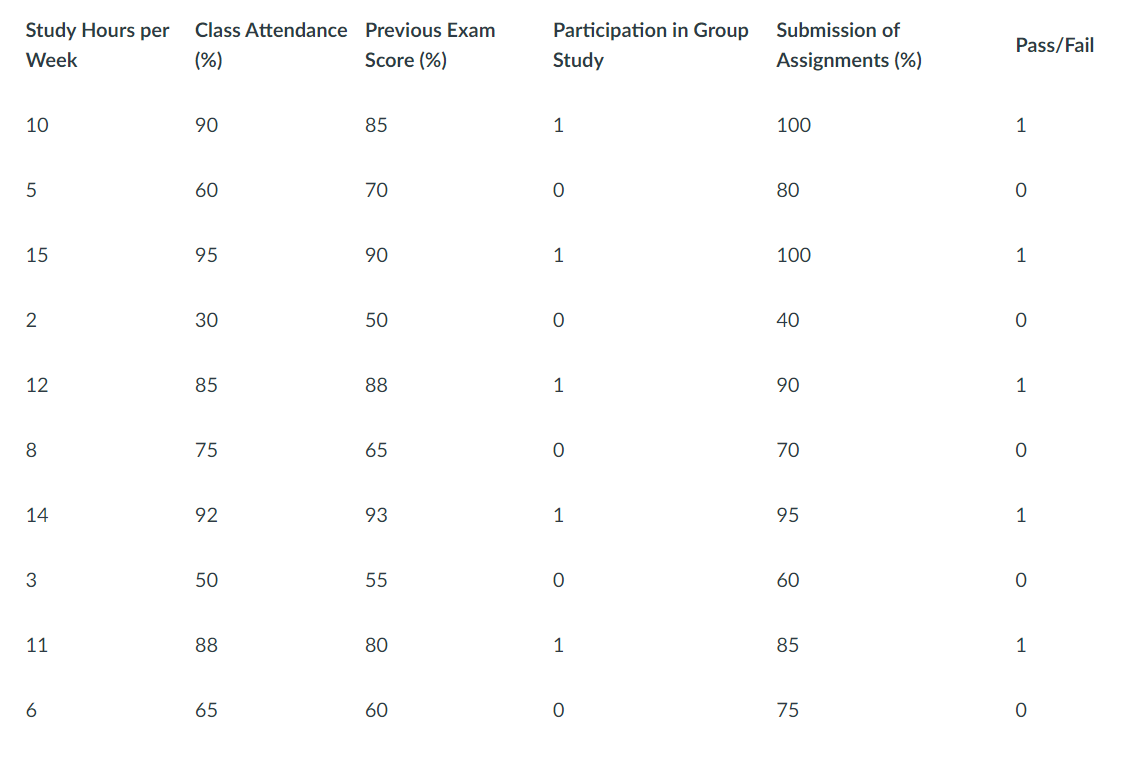

In [3]:
import pandas as pd
data = [[10, 90, 85, 1, 100, 1],
        [5, 60, 70, 0, 80, 0],
        [15, 95, 90, 1, 100, 1],
        [2, 30, 50, 0, 40, 0],
        [12, 85, 88, 1, 90, 1],
        [8, 75, 65, 0, 70, 0],
        [14, 92, 93, 1, 95, 1],
        [3, 50, 55, 0, 60, 0],
        [11, 88, 80, 1, 85, 1],
        [6, 65, 60, 0, 75, 0]]
df = pd.DataFrame(data, columns=['Study Hours per Week', 'Class Attendance (%)', 'Previous Exam Score (%)', 'Participation in Group Study', 'Submission of Assignments (%)', 'Pass/Fail'])
df

,Study Hours per Week,Class Attendance (%),Previous Exam Score (%),Participation in Group Study,Submission of Assignments (%),Pass/Fail
0,10,90,85,1,100,1
1,5,60,70,0,80,0
2,15,95,90,1,100,1
3,2,30,50,0,40,0
4,12,85,88,1,90,1
5,8,75,65,0,70,0
6,14,92,93,1,95,1
7,3,50,55,0,60,0
8,11,88,80,1,85,1
9,6,65,60,0,75,0


In [4]:
df.to_csv('student_data.csv', index=False)
df

,Study Hours per Week,Class Attendance (%),Previous Exam Score (%),Participation in Group Study,Submission of Assignments (%),Pass/Fail
0,10,90,85,1,100,1
1,5,60,70,0,80,0
2,15,95,90,1,100,1
3,2,30,50,0,40,0
4,12,85,88,1,90,1
5,8,75,65,0,70,0
6,14,92,93,1,95,1
7,3,50,55,0,60,0
8,11,88,80,1,85,1
9,6,65,60,0,75,0


In [5]:
x = df.drop('Pass/Fail', axis=1)
y = df['Pass/Fail']

In [6]:
import numpy as np
list=[2.0,3.0,7.0,1.0,5.0]
weight = np.array(list)
weight

array([2., 3., 7., 1., 5.])

In [7]:
def update(p,e,i):
  for j in range(len(weight)):
    weight[j]=weight[j]+p*e*float(x.iloc[i:i+1,j:j+1].values)

In [8]:
print(x.iloc[0:1,1:2])

   Class Attendance (%)
0                    90


In [9]:
learning_rate = 0.001
def error(yp,i):
  e=y[i]-yp
  if(e!=0):
    update(learning_rate,e,i)

In [10]:
yp=-1
import numpy as np
for k in range(6):
  for i in range (len(x)):
    z=np.dot(x[i:i+1],weight)
    if z>0:
      yp=1
    else:
      yp=0
    error(yp,i)
#print(yp)

<ipython-input-7-3d67c18ae89d>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  weight[j]=weight[j]+p*e*float(x.iloc[i:i+1,j:j+1].values)


In [11]:
print("Trained Weights:", weight)

# Prediction Function
def perceptron_predict(x, weights):
    z = np.dot(x, weights)
    return 1 if z >= 0 else 0

# Test the model
correct_predictions = 0
for i in range(len(x)):
    prediction = perceptron_predict(x[i:i+1], weight)
    if prediction == y[i]:
        correct_predictions += 1

# Accuracy calculation
accuracy = correct_predictions / len(x)
print(f"Accuracy: {accuracy * 100:.2f}%")

Trained Weights: [1.856 1.32  5.2   1.    3.05 ]
Accuracy: 50.00%


# QUESTION-2
Implement a perceptron learning model to train above data, and find the accuracy.

In [12]:
import pandas as pd
diabetes=pd.read_csv('/content/diabetes_data_upload.csv')
diabetes.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [13]:
target_var=diabetes['class']
target_var.head()

,class
0,Positive
1,Positive
2,Positive
3,Positive
4,Positive


In [14]:
features=diabetes.drop('class',axis=1)
features.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes


In [15]:
one_values = ["Male", "Yes"]
zero_values = ["Female","No"]

for column in features.columns:
    features[column] = features[column].replace(to_replace=one_values, value=1)
    features[column] = features[column].replace(to_replace=zero_values, value=0)
features

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0


In [16]:
one_values = ["Positive"]
zero_values = ["Negative"]

target_var = target_var.replace(to_replace=one_values, value=1)
target_var= target_var.replace(to_replace=zero_values, value=0)
target_var.head()

,class
0,1
1,1
2,1
3,1
4,1


In [17]:
import numpy as np

In [18]:
list1 = [0.21, 0.60, 0.78, 0.22, 0.62 ,
       0.53, 0.39, 0.036, 0.04 , 0.87,
       0.89, 0.13, 0.79, 0.13, 0.50,
       0.80]
weights=np.array(list1)
weights

array([0.21 , 0.6  , 0.78 , 0.22 , 0.62 , 0.53 , 0.39 , 0.036, 0.04 ,
       0.87 , 0.89 , 0.13 , 0.79 , 0.13 , 0.5  , 0.8  ])

In [19]:
features.iloc[0:1].values

array([[40,  1,  0,  1,  0,  1,  0,  0,  0,  1,  0,  1,  0,  1,  1,  1]])

In [20]:
def update(p,e,i):
  for j in range(len(weights)):
    weights[j]=weights[j]+p*e*float(features.iloc[i:i+1,j:j+1].values)

In [21]:

int cp
learning_rate = 0.001
def error(yp,i):
  e=target_var[i]-yp
  if(e!=0):
    update(learning_rate,e,i)
  return cp

In [26]:
yp=-1
import numpy as np
for k in range(6):
  for i in range (len(features)):
    z=np.dot(features[i:i+1],weights)
    if z>0:
      yp=1
    else:
      yp=0
    error(yp,i)

<ipython-input-20-19e2523c4990>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  weights[j]=weights[j]+p*e*float(features.iloc[i:i+1,j:j+1].values)


In [24]:
weights

array([0.21 , 0.6  , 0.78 , 0.22 , 0.62 , 0.53 , 0.39 , 0.036, 0.04 ,
       0.87 , 0.89 , 0.13 , 0.79 , 0.13 , 0.5  , 0.8  ])

In [25]:
print("Trained Weights:", weights)

# Prediction Function
def perceptron_predict(x, weights):
    z = np.dot(x, weights)
    return 1 if z >= 0 else 0

# Test the model
correct_predictions = 0
for i in range(len(features)):
    prediction = perceptron_predict(features[i:i+1], weights)
    if prediction == target_var[i]:
        correct_predictions += 1

# Accuracy calculation
accuracy = correct_predictions / len(features)
print(f"Accuracy: {accuracy * 100:.2f}%")

Trained Weights: [0.21  0.6   0.78  0.22  0.62  0.53  0.39  0.036 0.04  0.87  0.89  0.13
 0.79  0.13  0.5   0.8  ]
Accuracy: 61.54%
